**Mukhammadkodir Abdusalomov**  
**January 2025**  
**Unsupervised Learning**  
**Faculty of Economic Sciences**  
**Department of Data Science**  
**University of Warsaw**  
**Supervised by: dr hab. prof. Jacek Lewkowicz** 

# Introduction  

In this project, I analyze consumer behavior using market basket analysis to uncover meaningful relationships between items frequently purchased together. By studying transaction patterns, I aim to identify actionable insights that can enhance decision-making in retail, marketing, and product recommendations.  

The dataset I selected includes a variety of items such as Bread, Butter, Sugar, and unique options like Unicorn and Chocolate. Using Association Rule Mining, I uncover hidden patterns and connections between these products. The analysis focuses on revealing which items are often bought together, providing valuable insights for cross-selling opportunities, strategic product placement, and personalized marketing efforts.  

For this study, I employed the Apriori algorithm, a popular and efficient method for mining frequent itemsets and generating association rules. Its simplicity and effectiveness make it well-suited for analyzing this dataset and extracting meaningful patterns.  

The process begins with loading the dataset and preparing it for analysis. This involves organizing transaction data and transforming it into a format suitable for identifying associations. The findings from this project aim to enhance my understanding of consumer preferences while showcasing the power of data-driven strategies in practical applications.

## Data Loading

To begin the analysis, the dataset was loaded into a Pandas DataFrame for processing. The following steps were performed:

Importing Libraries: Necessary libraries such as pandas and numpy were imported.
File Path Definition: The path to the dataset file (basket_analysis.csv) was specified.
Loading the Data: The dataset was read using pd.read_csv and stored in a DataFrame.
Previewing the Data: The first five rows of the dataset were displayed to understand its structure and content.

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from IPython.display import display, HTML
file_path = Path('basket_analysis.csv')
df = pd.read_csv(file_path)
display(HTML(df.head(5).to_html()))

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Understanding the Dataset Structure

The df.info() function was used to get a summary of the dataset, which provided key details about its structure, column types, and missing values.

1. Entries: The dataset contains 1850 rows, representing individual transactions.
2. Columns: There are 17 columns in total:
   16 item columns: Each column represents a specific product (ex: Apple, Bread), indicating whether the product was part of a transaction.
3. Non-Null Values:
   Most columns have 1848 non-null values, meaning there are 2 missing values in each of these columns.

4. Data Types:
   All item columns are stored as objects, likely representing binary values like True or False.
     
This function is useful for quickly understanding the structure of the dataset and identifying any potential issues, such as missing values or incorrect data types, before proceeding with further analysis.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1850 non-null   int64 
 1   Apple         1848 non-null   object
 2   Bread         1848 non-null   object
 3   Butter        1848 non-null   object
 4   Cheese        1848 non-null   object
 5   Corn          1848 non-null   object
 6   Dill          1848 non-null   object
 7   Eggs          1848 non-null   object
 8   Ice cream     1848 non-null   object
 9   Kidney Beans  1848 non-null   object
 10  Milk          1848 non-null   object
 11  Nutmeg        1848 non-null   object
 12  Onion         1848 non-null   object
 13  Sugar         1848 non-null   object
 14  Unicorn       1848 non-null   object
 15  Yogurt        1848 non-null   object
 16  chocolate     1848 non-null   object
dtypes: int64(1), object(16)
memory usage: 245.8+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'Apple', 'Bread', 'Butter', 'Cheese', 'Corn', 'Dill',
       'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Sugar',
       'Unicorn', 'Yogurt', 'chocolate'],
      dtype='object')

### Initial Rows of the Dataset

To explore the structure and content of the dataset, I used the df.head(20) function, which displays the first 20 rows. This step is essential for understanding the dataset's layout, column names, and the initial data values. It provides an overview of the key features and helps identify potential patterns or inconsistencies early in the analysis.

The dataset includes 17 columns, with the first being an index-like column (Unnamed: 0), followed by binary columns representing various items like Apple, Bread, Butter, and more. Each row corresponds to a transaction, and the True or False values indicate whether a specific item was included in the transaction.

This initial inspection ensures that I am familiar with the dataset's structure before diving deeper into data processing and analysis.


In [9]:
df.head(20)

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,True,True,True,True,False,True,False,True,False,False,True,False,False,True,True,True
6,6,False,False,True,False,False,False,True,True,True,True,True,True,False,False,True,False
7,7,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False
8,8,True,False,False,False,True,True,True,True,False,True,True,True,True,True,True,True
9,9,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True


In [11]:
df.tail()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
1845,1845,False,False,True,True,False,False,False,True,True,True,False,True,True,False,True,False
1846,1846,False,True,False,True,False,False,False,True,True,False,True,False,True,True,True,False
1847,1847,True,False,False,False,True,True,False,True,True,False,True,False,False,False,True,True
1848,1848,False,False,True,False,True,False,False,False,False,True,False,False,True,True,True,False
1849,1849,True,True,True,True,True,False,True,False,False,False,True,True,True,False,True,True


### Dataset Overview Using df.info

To gain a comprehensive understanding of the dataset, I used the df.info() method. This function is crucial because it provides a summary of the dataset's structure, including:

1. The number of entries (rows) and columns.
2. Column names and their data types.
3. The count of non-null values in each column.
4. The memory usage of the dataset.

This information is important as it allows me to quickly identify any missing data, the types of each column, and the overall size of the dataset. Understanding these aspects ensures that I can choose the correct preprocessing steps and analysis techniques later in the project.

In [13]:
df.info

<bound method DataFrame.info of       Unnamed: 0  Apple  Bread Butter Cheese   Corn   Dill   Eggs Ice cream  \
0              0  False   True  False  False   True   True  False      True   
1              1  False  False  False  False  False  False  False     False   
2              2   True  False   True  False  False   True  False      True   
3              3  False  False   True   True  False   True  False     False   
4              4   True   True  False  False  False  False  False     False   
...          ...    ...    ...    ...    ...    ...    ...    ...       ...   
1845        1845  False  False   True   True  False  False  False      True   
1846        1846  False   True  False   True  False  False  False      True   
1847        1847   True  False  False  False   True   True  False      True   
1848        1848  False  False   True  False   True  False  False     False   
1849        1849   True   True   True   True   True  False   True     False   

     Kidney Beans  

In [15]:
df.describe()

,Unnamed: 0
count,1850.000000
mean,924.500000
std,534.193317
min,0.000000
25%,462.250000
50%,924.500000
75%,1386.750000
max,1849.000000


### Top 10 Most Purchased Items

In this section, I analyze the most frequently purchased items based on the dataset. The following items were identified as the top 10 most purchased:

- Yogurt
- Sugar
- Ice cream
- Onion
- Cheese
- Butter
- Chocolate
- Corn
- Nutmeg
- Dill

I used the code below to calculate and display the count of these items:

<Axes: title={'center': 'Top 10 Most Purchased Items'}>

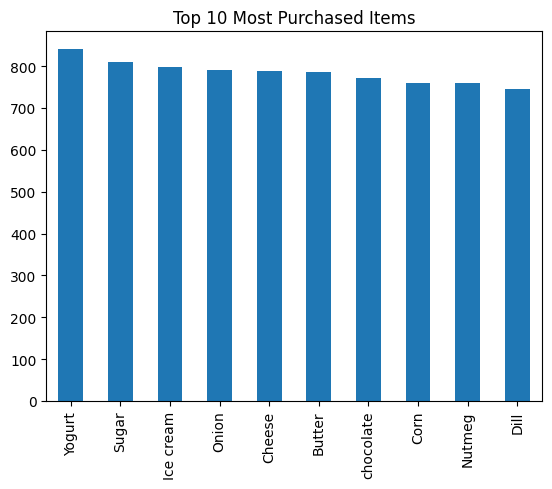

In [17]:
item_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)
item_counts.head(10).plot(kind='bar', title='Top 10 Most Purchased Items')

Text(0.5, 1.0, 'Heatmap of Item Co-occurrence')

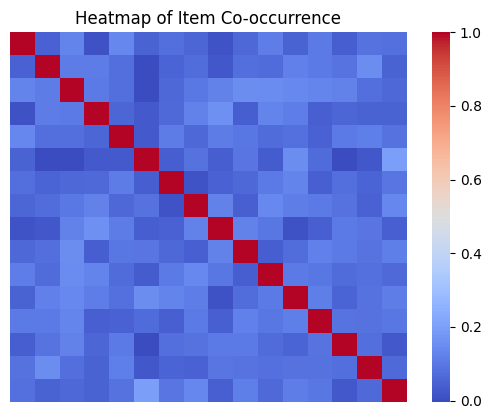

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
co_occurrence = df.iloc[:, 1:].corr()
sns.heatmap(co_occurrence, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Item Co-occurrence')

### Absolute and Relative Frequency Analysis

In this section, I calculate the absolute frequency and relative frequency of the most purchased items in the dataset.

- Absolute frequency shows the total count of each item purchased, which indicates how many times each item appears in the dataset.
- Relative frequency represents the proportion of each item purchased compared to the total number of purchases. It gives insight into how popular each item is relative to the others.
This analysis helps in understanding the most frequently purchased items both in terms of raw counts and their relative popularity.

The results are as follows:

In [23]:
absolute_frequency = df.iloc[:, 1:].sum().sort_values(ascending=False)
print("Absolute Frequency:\n", absolute_frequency.head(10))
relative_frequency = df.iloc[:, 1:].mean().sort_values(ascending=False)
print("Relative Frequency:\n", relative_frequency.head(10))

Absolute Frequency:
 Yogurt       841
Sugar        811
Ice cream    797
Onion        792
Cheese       788
Butter       787
chocolate    772
Corn         761
Nutmeg       759
Dill         746
dtype: object
Relative Frequency:
 Yogurt       0.455087
Sugar        0.438853
Ice cream    0.431277
Onion        0.428571
Cheese       0.426407
Butter       0.425866
chocolate    0.417749
Corn         0.411797
Nutmeg       0.410714
Dill          0.40368
dtype: object


In [25]:
df.iloc[0:10]

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,True,True,True,True,False,True,False,True,False,False,True,False,False,True,True,True
6,6,False,False,True,False,False,False,True,True,True,True,True,True,False,False,True,False
7,7,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False
8,8,True,False,False,False,True,True,True,True,False,True,True,True,True,True,True,True
9,9,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True


### Missing Value Handling

In this section, I address missing values in the dataset. Missing values can occur for various reasons, and they can affect the accuracy of the analysis. To handle this, I first checked for any missing values by using the method df.isnull().sum(), which shows how many missing values are present in each column of the dataset.

Next, I handled the missing values by filling them with 0 using the df.fillna(0) method. This ensures that there are no gaps in the dataset, allowing the analysis to continue without errors caused by missing data.

Handling missing values in this way is important because it ensures that the dataset remains complete, allowing for accurate calculations and analysis.


In [27]:
print(df.isnull().sum())
df = df.fillna(0) 

Unnamed: 0      0
Apple           2
Bread           2
Butter          2
Cheese          2
Corn            2
Dill            2
Eggs            2
Ice cream       2
Kidney Beans    2
Milk            2
Nutmeg          2
Onion           2
Sugar           2
Unicorn         2
Yogurt          2
chocolate       2
dtype: int64


### Renaming Columns

In this section, I renamed a column in the dataset for better clarity. The column labeled 'Unnamed: 0' was renamed to 'TransactionID'. This makes it easier to understand and work with the data. The change was made using the rename method with the argument inplace=True, which directly modified the dataset without creating a new one.

In [29]:
df.rename(columns={'Unnamed: 0': 'TransactionID'}, inplace=True)

In [31]:
df

,TransactionID,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,False,False,True,True,False,False,False,True,True,True,False,True,True,False,True,False
1846,1846,False,True,False,True,False,False,False,True,True,False,True,False,True,True,True,False
1847,1847,True,False,False,False,True,True,False,True,True,False,True,False,False,False,True,True
1848,1848,False,False,True,False,True,False,False,False,False,True,False,False,True,True,True,False


In [33]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  1850 non-null   int64 
 1   Apple          1850 non-null   object
 2   Bread          1850 non-null   object
 3   Butter         1850 non-null   object
 4   Cheese         1850 non-null   object
 5   Corn           1850 non-null   object
 6   Dill           1850 non-null   object
 7   Eggs           1850 non-null   object
 8   Ice cream      1850 non-null   object
 9   Kidney Beans   1850 non-null   object
 10  Milk           1850 non-null   object
 11  Nutmeg         1850 non-null   object
 12  Onion          1850 non-null   object
 13  Sugar          1850 non-null   object
 14  Unicorn        1850 non-null   object
 15  Yogurt         1850 non-null   object
 16  chocolate      1850 non-null   object
dtypes: int64(1), object(16)
memory usage: 245.8+ KB
None
TransactionID    0

### Taking a Sample from the Dataset

In this section, I took a random sample of 5 rows from the dataset to get a quick overview of the data. This helps in understanding the structure of the data and verifying the value
This sample helps in understanding the distribution and presence of values for different items in the dataset..

The sample data looks like :the dataset.


In [35]:
sample_data = df.sample(5)
print(sample_data)

      TransactionID  Apple  Bread Butter Cheese   Corn   Dill   Eggs  \
379             379   True   True   True  False   True  False   True   
513             513  False  False  False   True  False  False  False   
1606           1606  False  False  False   True  False   True  False   
779             779  False   True  False   True  False   True   True   
626             626  False  False  False  False   True  False   True   

     Ice cream Kidney Beans   Milk Nutmeg  Onion  Sugar Unicorn Yogurt  \
379       True        False  False   True   True   True    True  False   
513      False         True  False  False  False   True   False  False   
1606      True         True  False  False  False   True   False   True   
779      False        False  False  False   True   True   False  False   
626       True        False  False  False  False  False   False  False   

     chocolate  
379       True  
513      False  
1606      True  
779      False  
626      False  


As my dataset contains only boolean values, I dont need to discretize

## Exploratory steps to understand the data and relationships: before applying any algorithm

In [37]:
print(df.shape)

(1850, 17)


In [39]:
print(len(df))

1850


In [41]:
print(df.columns.tolist())

['TransactionID', 'Apple', 'Bread', 'Butter', 'Cheese', 'Corn', 'Dill', 'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Sugar', 'Unicorn', 'Yogurt', 'chocolate']


# Association Rule Mining:

### Itemset Frequency Calculation using Apriori Algorithm

In this section, I used the Apriori algorithm to find frequent itemsets in the dataset. The Apriori algorithm is used to identify sets of items that frequently appear together in transactions. 

I applied the algorithm with a minimum support threshold of 0.01, which means that only itemsets that appear in at least 1% of the transactions are considered. The result shows the itemsets along with their support values.

The output includes the support value for each itemset. Some Examples:

- Apple: 0.390811
- Bread: 0.375135
- Butter: 0.425405
- Cheese: 0.425946
- Corn: 0.411351

There are also more complex itemsets with multiple items, such as:

- (Onion, Dill, Corn, Milk, Ice cream, Chocolate) with a support of 0.011351
- (Onion, Apple, Corn, Bread, Nutmeg, Chocolate) with a support of 0.012432

This helps in identifying which items are commonly purchased together and can be used for further analysis.

After applying the Apriori algorithm to the dataset, I obtained 12,257 rows and 2 columns. This result includes all the frequent itemsets (combinations of items) that appear together in at least 1% of the transactions, based on the minimum support threshold of 0.01.

- Rows: The 12,257 rows represent all the unique itemsets that meet the support threshold. This means there are 12,257 different combinations of items that frequently occur together in the transactions.
- Columns: The two columns in the result are:
  - Support: The support value for each itemset, which shows the frequency of occurrence of that specific itemset.
  - Itemsets: The actual combinations of items that were found to have the specified minimum support.


In [43]:
from mlxtend.frequent_patterns import apriori
item_freq = apriori(df.drop('TransactionID', axis=1), min_support=0.01, use_colnames=True)
item_freq

C:\Users\khali\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.390811,(Apple)
1,0.375135,(Bread)
2,0.425405,(Butter)
3,0.425946,(Cheese)
4,0.411351,(Corn)
...,...,...
12252,0.011351,"(Onion, Dill, Corn, Milk, Ice cream, chocolate..."
12253,0.012432,"(Onion, Apple, Corn, Bread, Nutmeg, chocolate,..."
12254,0.01027,"(Onion, Apple, Corn, Bread, Nutmeg, chocolate,..."
12255,0.011351,"(Onion, Apple, Corn, Bread, Nutmeg, chocolate,..."


### Frequent Itemsets using fpgrowth (Eclat-like Algorithm)

In this section, I applied the fpgrowth algorithm to find frequent itemsets in the dataset. The fpgrowth algorithm is an alternative to the Eclat algorithm and is often used for mining frequent itemsets in large datasets. Like Apriori, it identifies combinations of items that appear together in transactions based on a minimum support threshold.

I used a minimum support of 0.01, meaning that only itemsets appearing in at least 1% of the transactions were considered. The output includes the support value for each itemset and the corresponding itemsets.

The result has 12,257 rows and 2 columns:
- **Rows**: Each row represents a unique itemset that meets the minimum support threshold.
- **Columns**: 
  - **Support**: The frequency of each itemset in the dataset.
  - **Itemsets**: The specific combinations of items that meet the support threshold.

Some of the frequent itemsets include:
- (Yogurt) with a support of 0.454595
- (Sugar) with a support of 0.438378
- (Ice cream) with a support of 0.430811
- (Chocolate) with a support of 0.417297
- (Corn) with a support of 0.411351

More complex itemsets, such as:
- (Corn, Bread, Eggs, Butter) with a support of 0.048108
- (Onion, Corn, Bread, Yogurt, Eggs) with a support of 0.029189

The large number of rows indicates many possible itemsets that frequently appear together in the transactions. This result is useful for association rule mining and understanding patterns in customer purchases.


In [45]:
from mlxtend.frequent_patterns import fpgrowth
itemsets_eclat = fpgrowth(df.drop('TransactionID', axis=1), min_support=0.01, use_colnames=True)
itemsets_eclat

C:\Users\khali\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.454595,(Yogurt)
1,0.438378,(Sugar)
2,0.430811,(Ice cream)
3,0.417297,(chocolate)
4,0.411351,(Corn)
...,...,...
12252,0.048108,"(Corn, Bread, Eggs, Butter)"
12253,0.029189,"(Onion, Corn, Bread, Yogurt, Eggs)"
12254,0.027568,"(Corn, Bread, Butter, Yogurt, Eggs)"
12255,0.017838,"(Onion, Corn, Bread, Butter, Yogurt, Eggs)"


In [47]:
itemsets_apriori = apriori(df.drop('TransactionID', axis=1), min_support=0.01, use_colnames=True)
itemsets_apriori

C:\Users\khali\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.390811,(Apple)
1,0.375135,(Bread)
2,0.425405,(Butter)
3,0.425946,(Cheese)
4,0.411351,(Corn)
...,...,...
12252,0.011351,"(Onion, Dill, Corn, Milk, Ice cream, chocolate..."
12253,0.012432,"(Onion, Apple, Corn, Bread, Nutmeg, chocolate,..."
12254,0.01027,"(Onion, Apple, Corn, Bread, Nutmeg, chocolate,..."
12255,0.011351,"(Onion, Apple, Corn, Bread, Nutmeg, chocolate,..."


In [49]:
print(itemsets_apriori.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12257 entries, 0 to 12256
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   support   12257 non-null  object
 1   itemsets  12257 non-null  object
dtypes: object(2)
memory usage: 191.6+ KB
None


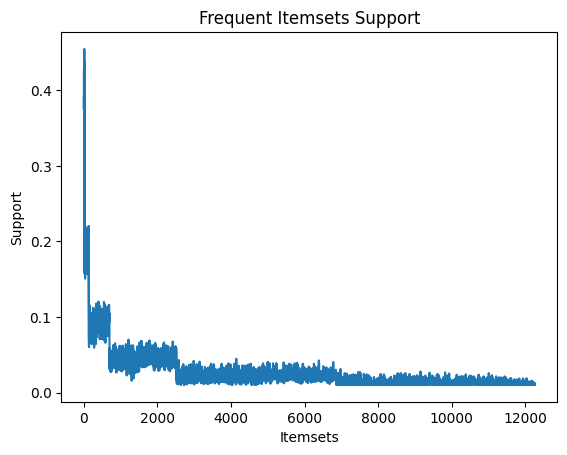

In [352]:
itemsets_apriori['support'].plot()
plt.title('Frequent Itemsets Support')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.show()

### Association Rules using Lift

In this section, I applied the association rules algorithm to the frequent itemsets obtained from the Apriori algorithm. The goal was to identify relationships between items that appear frequently together in transactions. The metric used to evaluate these rules was "lift," which measures the strength of a rule by comparing the observed support of the itemset to the expected support if the items were independent.

The result shows the top 50 association rules, including the antecedents and consequents, their support, confidence, lift, and other metrics. 

Some of the association rules include:

- If a customer buys Bread, they are likely to buy Apple with a confidence of 42.07% and a lift of 1.08.
- If a customer buys Apple, they are likely to buy Butter with a confidence of 50.35% and a lift of 1.18.
- If a customer buys Butter, they are likely to buy Apple with a confidence of 46.25% and a lift of 1.18.

The metrics used in the association rulesnclude:
- **Antecent Support**: The support of the items in the aecedent.
- **Consuent Support**: The support of the items in the nsequen
- **Support**: The support of the tire rule.- **Confidence**: The probability of the consequent given thantedent.
- **Lift**: The ratio of observed support to 
 of the antecedent.

These association rules help in understanding the relationships between items and can be useful for recommendations, marketing strategies, and understanding customer behavior.


In [59]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(itemsets_apriori, metric="lift", min_threshold=1.0)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Apple),0.375135,0.390811,0.157838,0.420749,1.076606,0.011231,1.051685,0.113873
1,(Apple),(Bread),0.390811,0.375135,0.157838,0.403873,1.076606,0.011231,1.048207,0.116803
2,(Apple),(Butter),0.390811,0.425405,0.196757,0.503458,1.183478,0.030504,1.157192,0.254490
3,(Butter),(Apple),0.425405,0.390811,0.196757,0.462516,1.183478,0.030504,1.133409,0.269812
4,(Apple),(Cheese),0.390811,0.425946,0.169189,0.432918,1.016369,0.002725,1.012295,0.026438
5,(Cheese),(Apple),0.425946,0.390811,0.169189,0.397208,1.016369,0.002725,1.010613,0.028056
6,(Corn),(Apple),0.411351,0.390811,0.192973,0.469120,1.200375,0.032212,1.147507,0.283577
7,(Apple),(Corn),0.390811,0.411351,0.192973,0.493776,1.200375,0.032212,1.162822,0.274015
8,(Dill),(Apple),0.403243,0.390811,0.169730,0.420912,1.077021,0.012138,1.051979,0.119836
9,(Apple),(Dill),0.390811,0.403243,0.169730,0.434302,1.077021,0.012138,1.054903,0.117391


### Association Rules

- {Bread} => {Apple}
- {Apple} => {Bread}
- {Apple} => {Butter}
- {Butter} => {Apple}
- {Apple} => {Cheese}
- {Cheese} => {Apple}
- {Corn} => {Apple}
- {Apple} => {Corn}
- {Dill} => {Apple}
- {Apple} => {Dill}
- {Apple} => {Eggs}
- {Eggs} => {Apple}
- {Ice cream} => {Apple}
- {Apple} => {Ice cream}
- {Kidney Beans} => {Apple}
- {Apple} => {Kidney Beans}
- {Milk} => {Apple}
- {Apple} => {Milk}
- {Nutmeg} => {Apple}
- {Apple} => {Nutmeg}
- {Onion} => {Apple}
- {Apple} => {Onion}
- {Apple} => {Sugar}
- {Sugar} => {Apple}
- {Unicorn} => {Apple}
- {Apple} => {Unicorn}
- {Yogurt} => {Apple}
- {Apple} => {Yogurt}
- {chocolate} => {Apple}
- {Apple} => {chocolate}
- {Bread} => {Butter}
- {Butter} => {Bread}
- {Bread} => {Cheese}
- {Cheese} => {Bread}
- {Corn} => {Bread}
- {Bread} => {Corn}
- {Bread} => {Eggs}
- {Eggs} => {Bread}
- {Bread} => {Ice cream}
- {Ice cream} => {Bread}
- {Kidney Beans} => {Bread}
- {Bread} => {Kidney Beans}
- {Bread} => {Milk}
- {Milk} => {Bread}
- {Bread} => {Nutmeg}
- {Nutmeg} => {Bread}
- {Bread} => {Onion}
- {Onion} => {Bread}
- {Bread} => {Sugar}
- {Sugar} => {Bread}


### Closed Itemsets

- {Yogurt} with support 0.454595


In [67]:
closed_itemsets = itemsets_apriori[itemsets_apriori['support'] == itemsets_apriori['support'].max()]
closed_itemsets

,support,itemsets
14,0.454595,(Yogurt)


### Maximal Itemsets

- {Yogurt} with support 0.454595

In [69]:
maximal_itemsets = itemsets_apriori[itemsets_apriori['support'] == itemsets_apriori['support'].max()]
maximal_itemsets

,support,itemsets
14,0.454595,(Yogurt)


### Redundant Rules

- {Ice cream, Apple, Sugar} => {Dill, Yogurt}
- {Dill, Yogurt} => {Ice cream, Apple, Sugar}

In [71]:
redundant_rules = rules[rules['lift'] == 1.0] 
redundant_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
54926,"(Ice cream, Apple, Sugar)","(Dill, Yogurt)",0.100000,0.189189,0.018919,0.189189,1.0,0.0,1.0,0.0
54931,"(Dill, Yogurt)","(Ice cream, Apple, Sugar)",0.189189,0.100000,0.018919,0.100000,1.0,0.0,1.0,0.0


### Significant Rules (Lift > 1)

- {Bread} => {Apple} with lift 1.076606
- {Apple} => {Bread} with lift 1.076606
- {Apple} => {Butter} with lift 1.183478
- {Butter} => {Apple} with lift 1.183478
- {Apple} => {Cheese} with lift 1.016369
- {Cheese} => {Apple} with lift 1.016369
- {Corn} => {Apple} with lift 1.200375
- {Apple} => {Corn} with lift 1.200375
- {Dill} => {Apple} with lift 1.077021
- {Apple} => {Dill} with lift 1.077021
- {Apple} => {Eggs} with lift 1.124822
- {Eggs} => {Apple} with lift 1.124822
- {Ice cream} => {Apple} with lift 1.081945
- {Apple} => {Ice cream} with lift 1.081945
- {Kidney Beans} => {Apple} with lift 1.024889
- {Apple} => {Kidney Beans} with lift 1.024889
- {Milk} => {Apple} with lift 1.097117
- {Apple} => {Milk} with lift 1.097117
- {Nutmeg} => {Apple} with lift 1.166454
- {Apple} => {Nutmeg} with lift 1.166454


In [75]:
significant_rules = rules[rules['lift'] > 1.0]
significant_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Apple),0.375135,0.390811,0.157838,0.420749,1.076606,0.011231,1.051685,0.113873
1,(Apple),(Bread),0.390811,0.375135,0.157838,0.403873,1.076606,0.011231,1.048207,0.116803
2,(Apple),(Butter),0.390811,0.425405,0.196757,0.503458,1.183478,0.030504,1.157192,0.254490
3,(Butter),(Apple),0.425405,0.390811,0.196757,0.462516,1.183478,0.030504,1.133409,0.269812
4,(Apple),(Cheese),0.390811,0.425946,0.169189,0.432918,1.016369,0.002725,1.012295,0.026438
5,(Cheese),(Apple),0.425946,0.390811,0.169189,0.397208,1.016369,0.002725,1.010613,0.028056
6,(Corn),(Apple),0.411351,0.390811,0.192973,0.469120,1.200375,0.032212,1.147507,0.283577
7,(Apple),(Corn),0.390811,0.411351,0.192973,0.493776,1.200375,0.032212,1.162822,0.274015
8,(Dill),(Apple),0.403243,0.390811,0.169730,0.420912,1.077021,0.012138,1.051979,0.119836
9,(Apple),(Dill),0.390811,0.403243,0.169730,0.434302,1.077021,0.012138,1.054903,0.117391


### Superset Check

- Rule 1: {Bread} => {Apple}, Superset: False
- Rule 2: {Apple} => {Bread}, Superset: False
- Rule 3: {Apple} => {Butter}, Superset: False
- Rule 4: {Butter} => {Apple}, Superset: False
- Rule 5: {Apple} => {Cheese}, Superset: False
- Rule 6: {Cheese} => {Apple}, Superset: False
- Rule 7: {Corn} => {Apple}, Superset: False
- Rule 8: {Apple} => {Corn}, Superset: False
- Rule 9: {Dill} => {Apple}, Superset: False
- Rule 10: {Apple} => {Dill}, Superset: False
- Rule 11: {Apple} => {Eggs}, Superset: False
- Rule 12: {Eggs} => {Apple}, Superset: False
- Rule 13: {Ice cream} => {Apple}, Superset: False
- Rule 14: {Apple} => {Ice cream}, Superset: False
- Rule 15: {Kidney Beans} => {Apple}, Superset: False
- Rule 16: {Apple} => {Kidney Beans}, Superset: False
- Rule 17: {Milk} => {Apple}, Superset: False
- Rule 18: {Apple} => {Milk}, Superset: False
- Rule 19: {Nutmeg} => {Apple}, Superset: False
- Rule 20: {Apple} => {Nutmeg}, Superset: False


In [79]:
rules['superset'] = rules['antecedents'].apply(lambda x: len(x) > 1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,superset
0,(Bread),(Apple),0.375135,0.390811,0.157838,0.420749,1.076606,0.011231,1.051685,0.113873,False
1,(Apple),(Bread),0.390811,0.375135,0.157838,0.403873,1.076606,0.011231,1.048207,0.116803,False
2,(Apple),(Butter),0.390811,0.425405,0.196757,0.503458,1.183478,0.030504,1.157192,0.254490,False
3,(Butter),(Apple),0.425405,0.390811,0.196757,0.462516,1.183478,0.030504,1.133409,0.269812,False
4,(Apple),(Cheese),0.390811,0.425946,0.169189,0.432918,1.016369,0.002725,1.012295,0.026438,False
5,(Cheese),(Apple),0.425946,0.390811,0.169189,0.397208,1.016369,0.002725,1.010613,0.028056,False
6,(Corn),(Apple),0.411351,0.390811,0.192973,0.469120,1.200375,0.032212,1.147507,0.283577,False
7,(Apple),(Corn),0.390811,0.411351,0.192973,0.493776,1.200375,0.032212,1.162822,0.274015,False
8,(Dill),(Apple),0.403243,0.390811,0.169730,0.420912,1.077021,0.012138,1.051979,0.119836,False
9,(Apple),(Dill),0.390811,0.403243,0.169730,0.434302,1.077021,0.012138,1.054903,0.117391,False


### Supporting Transactions

- Rule 1: {Bread} => {Apple}, Supporting Transactions: 292
- Rule 2: {Apple} => {Bread}, Supporting Transactions: 292
- Rule 3: {Apple} => {Butter}, Supporting Transactions: 364
- Rule 4: {Butter} => {Apple}, Supporting Transactions: 364
- Rule 5: {Apple} => {Cheese}, Supporting Transactions: 313
- Rule 6: {Cheese} => {Apple}, Supporting Transactions: 313
- Rule 7: {Corn} => {Apple}, Supporting Transactions: 357
- Rule 8: {Apple} => {Corn}, Supporting Transactions: 357
- Rule 9: {Dill} => {Apple}, Supporting Transactions: 314
- Rule 10: {Apple} => {Dill}, Supporting Transactions: 314
- Rule 11: {Apple} => {Eggs}, Supporting Transactions: 302
- Rule 12: {Eggs} => {Apple}, Supporting Transactions: 302
- Rule 13: {Ice cream} => {Apple}, Supporting Transactions: 337
- Rule 14: {Apple} => {Ice cream}, Supporting Transactions: 337
- Rule 15: {Kidney Beans} => {Apple}, Supporting Transactions: 298
- Rule 16: {Apple} => {Kidney Beans}, Supporting Transactions: 298
- Rule 17: {Milk} => {Apple}, Supporting Transactions: 316
- Rule 18: {Apple} => {Milk}, Supporting Transactions: 316
- Rule 19: {Nutmeg} => {Apple}, Supporting Transactions: 346
- Rule 20: {Apple} => {Nutmeg}, Supporting Transactions: 346


In [83]:
rules['supporting_transactions'] = rules['support'] * len(df)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,superset,supporting_transactions
0,(Bread),(Apple),0.375135,0.390811,0.157838,0.420749,1.076606,0.011231,1.051685,0.113873,False,292.0
1,(Apple),(Bread),0.390811,0.375135,0.157838,0.403873,1.076606,0.011231,1.048207,0.116803,False,292.0
2,(Apple),(Butter),0.390811,0.425405,0.196757,0.503458,1.183478,0.030504,1.157192,0.254490,False,364.0
3,(Butter),(Apple),0.425405,0.390811,0.196757,0.462516,1.183478,0.030504,1.133409,0.269812,False,364.0
4,(Apple),(Cheese),0.390811,0.425946,0.169189,0.432918,1.016369,0.002725,1.012295,0.026438,False,313.0
5,(Cheese),(Apple),0.425946,0.390811,0.169189,0.397208,1.016369,0.002725,1.010613,0.028056,False,313.0
6,(Corn),(Apple),0.411351,0.390811,0.192973,0.469120,1.200375,0.032212,1.147507,0.283577,False,357.0
7,(Apple),(Corn),0.390811,0.411351,0.192973,0.493776,1.200375,0.032212,1.162822,0.274015,False,357.0
8,(Dill),(Apple),0.403243,0.390811,0.169730,0.420912,1.077021,0.012138,1.051979,0.119836,False,314.0
9,(Apple),(Dill),0.390811,0.403243,0.169730,0.434302,1.077021,0.012138,1.054903,0.117391,False,314.0


In [100]:
affinity = rules['lift']
affinity

0         1.076606
1         1.076606
2         1.183478
3         1.183478
4         1.016369
            ...   
532011    1.979613
532012    2.063884
532013    1.860970
532014    1.671819
532015    2.046579
Name: lift, Length: 532016, dtype: float64

In [104]:
interest_measure = rules[['support', 'confidence', 'lift']]
interest_measure.head(10)

,support,confidence,lift
0,0.157838,0.420749,1.076606
1,0.157838,0.403873,1.076606
2,0.196757,0.503458,1.183478
3,0.196757,0.462516,1.183478
4,0.169189,0.432918,1.016369
5,0.169189,0.397208,1.016369
6,0.192973,0.469120,1.200375
7,0.192973,0.493776,1.200375
8,0.169730,0.420912,1.077021
9,0.169730,0.434302,1.077021


In [122]:
from mlxtend.frequent_patterns import apriori, association_rules
df = df.drop(columns=['TransactionID'])
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

C:\Users\khali\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       support                            itemsets
0     0.390811                             (Apple)
1     0.375135                             (Bread)
2     0.425405                            (Butter)
3     0.425946                            (Cheese)
4     0.411351                              (Corn)
...        ...                                 ...
1182  0.051892      (Onion, Nutmeg, Yogurt, Sugar)
1183  0.052973    (Onion, Nutmeg, Yogurt, Unicorn)
1184  0.054595  (Onion, Nutmeg, Yogurt, chocolate)
1185  0.050811     (Unicorn, Onion, Yogurt, Sugar)
1186  0.058919   (chocolate, Onion, Yogurt, Sugar)

[1187 rows x 2 columns]


,antecedents,consequents,support,confidence,lift
0,(Apple),(Butter),0.196757,0.503458,1.183478
1,(Apple),(Sugar),0.196216,0.502075,1.145300
2,(Apple),(Yogurt),0.198378,0.507607,1.116615
3,(Bread),(Onion),0.189189,0.504323,1.178027
4,(Bread),(Sugar),0.189189,0.504323,1.150428
...,...,...,...,...,...
2403,"(Unicorn, Yogurt, Sugar)",(Onion),0.050811,0.519337,1.213098
2404,"(Onion, chocolate, Yogurt)",(Sugar),0.058919,0.558974,1.275096
2405,"(Onion, chocolate, Sugar)",(Yogurt),0.058919,0.545000,1.198870
2406,"(chocolate, Yogurt, Sugar)",(Onion),0.058919,0.567708,1.326086


Sorting rules by lift helps identify the strongest relationships, where higher lift values indicate stronger associations.

In [124]:
sorted_rules = rules.sort_values('lift', ascending=False)
high_confidence_rules = rules[rules['confidence'] > 0.7]
sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
966,"(Nutmeg, Sugar, Eggs)",(Apple),0.062162,0.672515,1.720819
879,"(Corn, Sugar, Eggs)",(Apple),0.057838,0.668750,1.711186
903,"(Corn, Nutmeg, Sugar)",(Apple),0.062162,0.664740,1.700925
970,"(Onion, Sugar, Eggs)",(Apple),0.061622,0.658960,1.686134
1178,"(Corn, Onion, Sugar)",(Bread),0.062703,0.630435,1.680554


A scatter plot is used to visualize the relationship between lift and confidence in the association rules. Each point represents a rule, with:

- X-axis: Confidence of the rule.
- Y-axis: Lift of the rule.
- Size of points: Support of the rule (larger points indicate higher support).
- Color of points: Lift, shaded using the Viridis color palette for better differentiation.

Text(0.5, 1.0, 'Scatter Plot of Lift vs. Confidence')

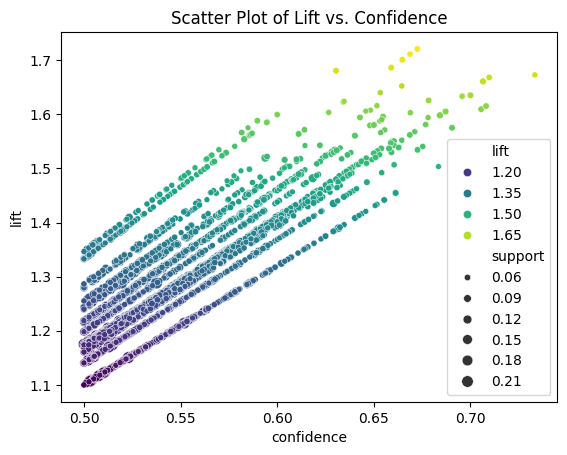

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', hue='lift', palette='viridis')
plt.title("Scatter Plot of Lift vs. Confidence")

### Network Graph of Association Rules

This visualization represents the association rules as a network graph. The nodes and edges provide insights into the relationships between itemation Rules"


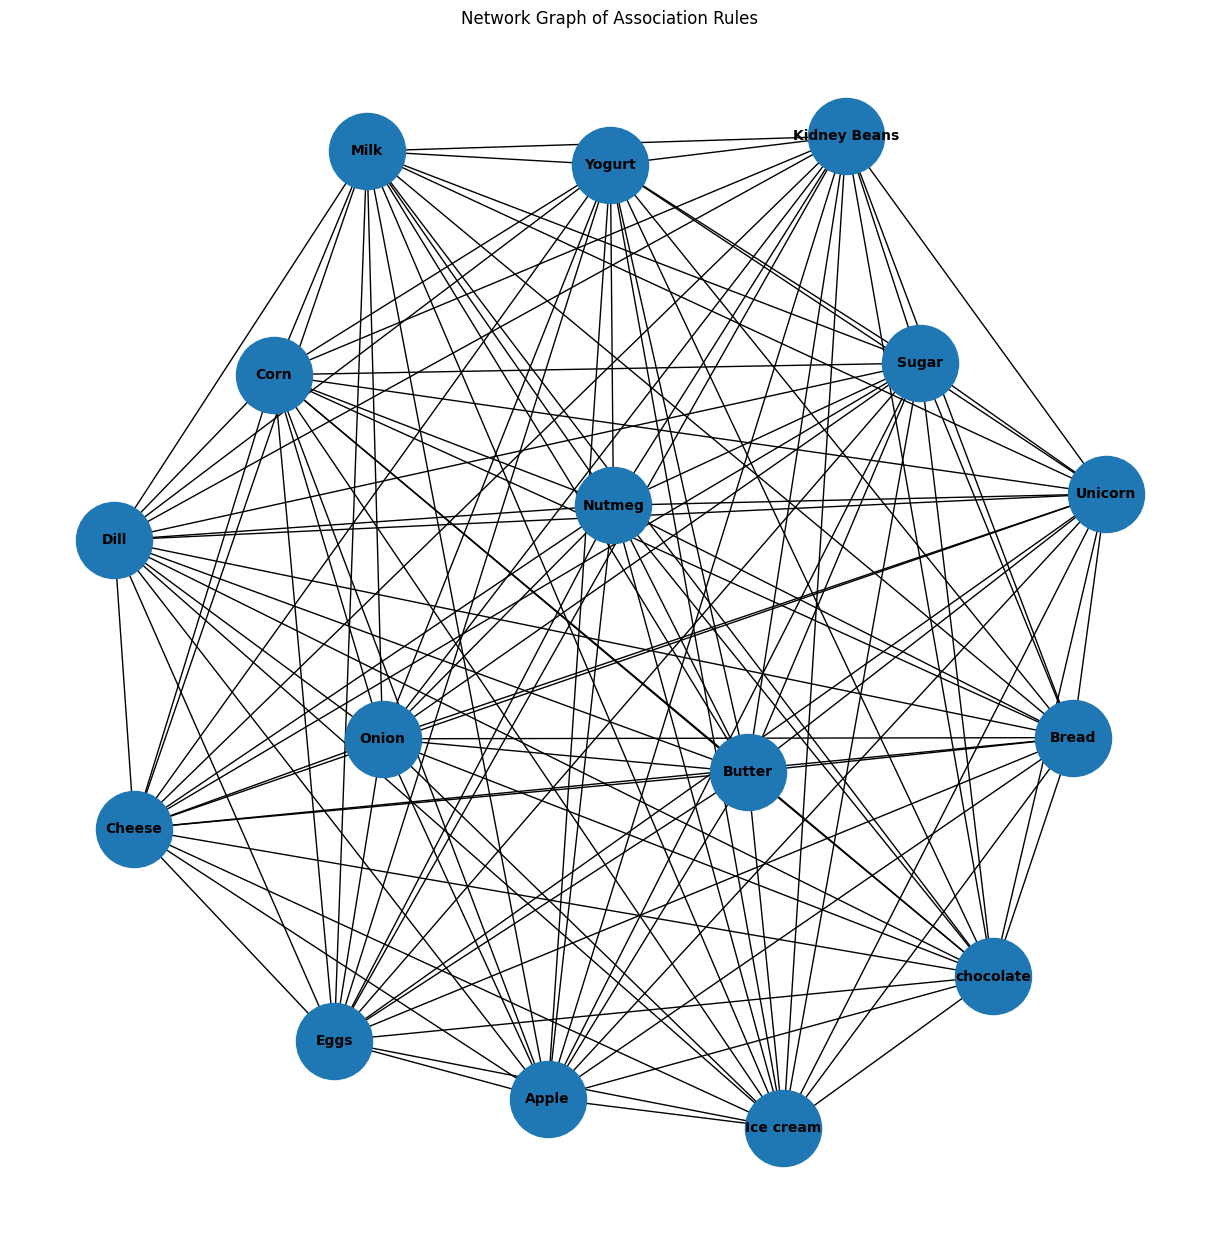

In [132]:
import networkx as nx
G = nx.Graph()
for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=3000, font_size=10, font_weight='bold')
plt.title("Network Graph of Association Rules")
plt.show()

This analysis provides an overview of the most significant patterns in the dataset:
- Frequent itemsets reveal the most common combinations of items.
- High-confidence rules identify reliable relationships between items.
- Lift highlights the strongest associations, indicating which items have a greater-than-expected co-occurrence.a greater-than-expected co-occurrence.


In [92]:
print("Top Frequent Itemsets:")
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head()
print(top_frequent_itemsets)
print("\nTop Association Rules by Confidence:")
top_association_rules = rules.sort_values(by='confidence', ascending=False).head()
print(top_association_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\nTop Association Rules by Lift:")
top_association_rules_lift = rules.sort_values(by='lift', ascending=False).head()
top_association_rules_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

C:\Users\khali\AppData\Local\Temp\ipykernel_9080\3094436431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_itemsets['support'], y=top_itemsets['itemsets'].astype(str), palette='Blues_d')


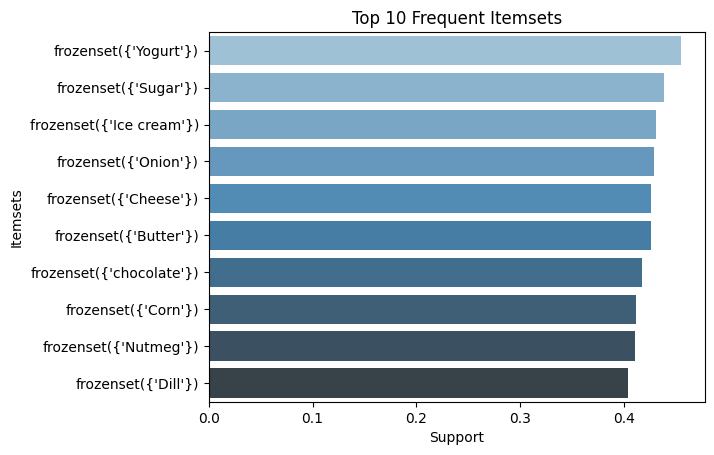

C:\Users\khali\AppData\Local\Temp\ipykernel_9080\3094436431.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="support", y="confidence", size="lift", data=rules, sizes=(20, 200), palette='viridis')


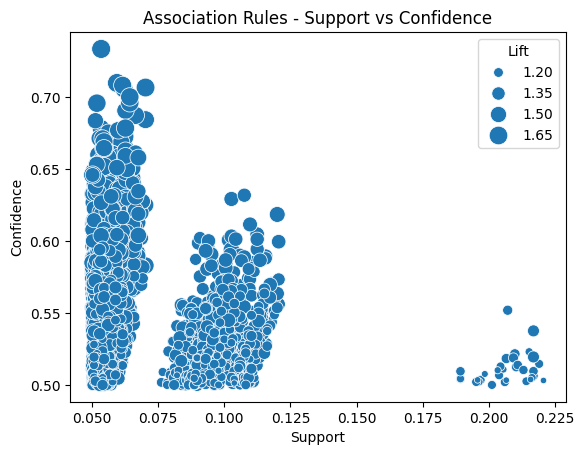

In [136]:
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
sns.barplot(x=top_itemsets['support'], y=top_itemsets['itemsets'].astype(str), palette='Blues_d')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, sizes=(20, 200), palette='viridis')
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title="Lift", loc='upper right')
plt.show()

## Visualization of Association Rules as a Directed Graph

This section provides a visualization of the association rules using a directed graph. Each node represents an item, and edges represent the relationships between antecedents and consequents, with the weights of the edges indicating the confidence of the rule.

### Key Elements of the Visualization:
- Nodes: Items involved in the rules (ex: Apple, Butter).
- Edges: Directed connections from antecedents to consequents, showcasing the direction of the rule.
- Edge Labels: Represent the confidence value of the rule, providing additional context for the strength of the association.
- Node Size and Color: Nodes are uniformly sized and colored for clarity, making the relationships the primary focus.

The spring layout algorithm (spring_layout) is used to position the nodes dynamically, ensuring a visually appealing and easily interpretable structure.

This network graph provides an intuitive way to understand the relationships between items and the confidence of their association rules.
tion rules.
tion rules.


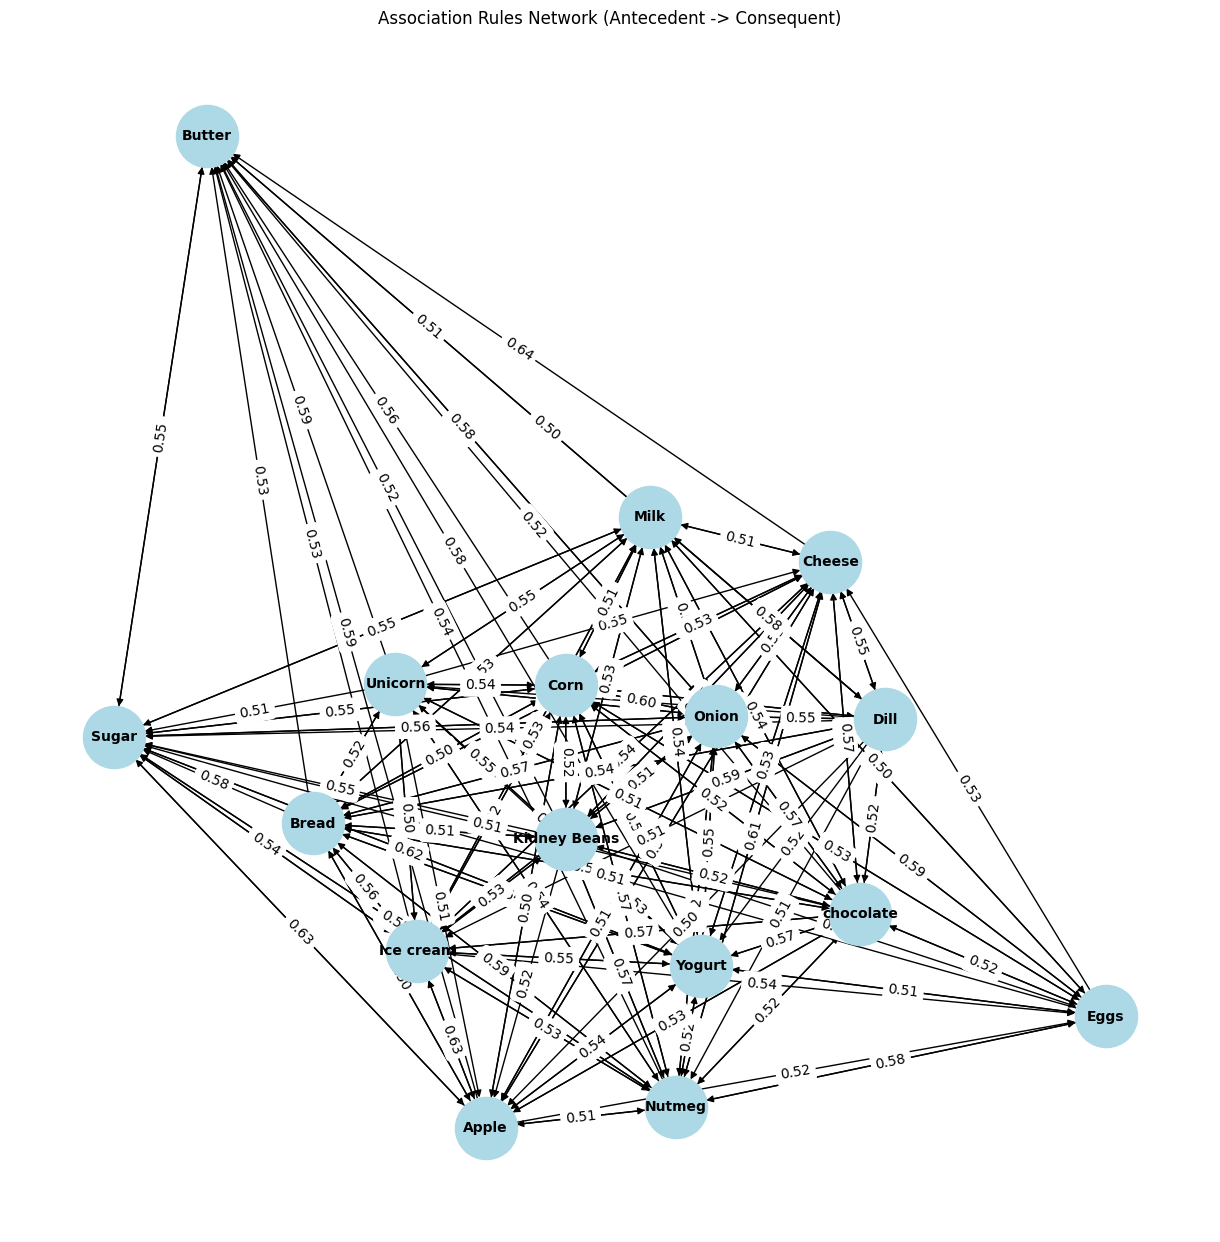

In [138]:
G = nx.DiGraph()
for index, row in rules.iterrows():
    antecedent = list(row['antecedents'])[0] 
    consequent = list(row['consequents'])[0] 
    weight = row['confidence']
    G.add_edge(antecedent, consequent, weight=weight)
pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Association Rules Network (Antecedent -> Consequent)")
plt.show()

In [140]:
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(5)
print("Top 5 Rules with Highest Lift Values:")
top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Top 5 Rules with Highest Lift Values:


,antecedents,consequents,support,confidence,lift
966,"(Nutmeg, Sugar, Eggs)",(Apple),0.062162,0.672515,1.720819
879,"(Corn, Sugar, Eggs)",(Apple),0.057838,0.668750,1.711186
903,"(Corn, Nutmeg, Sugar)",(Apple),0.062162,0.664740,1.700925
970,"(Onion, Sugar, Eggs)",(Apple),0.061622,0.658960,1.686134
1178,"(Corn, Onion, Sugar)",(Bread),0.062703,0.630435,1.680554


### Directed Graph of Top 5 Association Rules by Lift

This visualization represents the top 5 association rules with the highest lift values as a directed graph. The graph provides an overview of the strongest item associations in terms of their statistical significance.

The graph is a clear and effective way to identify and interpret the strongest associations within the dataset, making it easier to draw insights about item relationsh







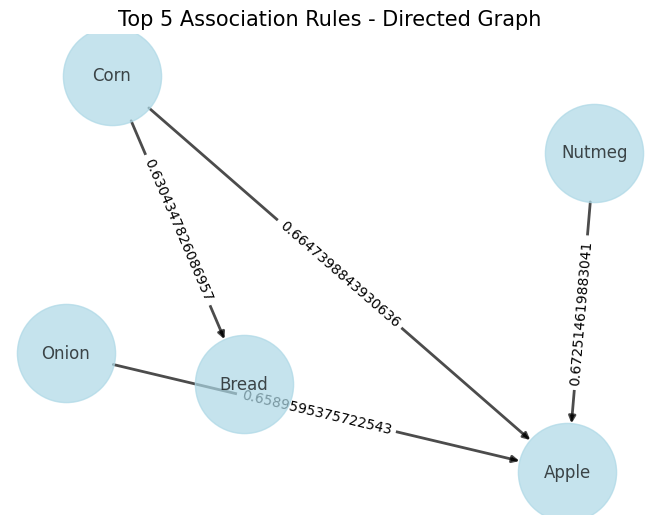

In [142]:
G = nx.DiGraph()
for index, row in top_lift_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    confidence = row['confidence']
    G.add_edge(antecedent, consequent, weight=confidence)
pos = nx.spring_layout(G, k=0.3, iterations=20)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', width=2, linewidths=1,
        node_size=5000, alpha=0.7, arrows=True, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Top 5 Association Rules - Directed Graph", fontsize=15)
plt.show()

In [144]:
rules['leverage'] = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])
print("Rules with Leverage and Conviction Metrics:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']].head()

Rules with Leverage and Conviction Metrics:


,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(Apple),(Butter),0.196757,0.503458,1.183478,0.030504,1.157192
1,(Apple),(Sugar),0.196216,0.502075,1.145300,0.024893,1.127923
2,(Apple),(Yogurt),0.198378,0.507607,1.116615,0.020718,1.107663
3,(Bread),(Onion),0.189189,0.504323,1.178027,0.028591,1.153759
4,(Bread),(Sugar),0.189189,0.504323,1.150428,0.024738,1.133039


In [146]:
eighth_rule = rules.iloc[7]
ninth_rule = rules.iloc[8]
eighth_antecedents = list(eighth_rule['antecedents'])
eighth_consequents = list(eighth_rule['consequents'])
ninth_antecedents = list(ninth_rule['antecedents'])
ninth_consequents = list(ninth_rule['consequents'])
print("8th Rule:")
print("Antecedents:", eighth_antecedents)
print("Consequents:", eighth_consequents)

print("\n9th Rule:")
print("Antecedents:", ninth_antecedents)
print("Consequents:", ninth_consequents)

8th Rule:
Antecedents: ['Milk']
Consequents: ['Butter']

9th Rule:
Antecedents: ['Nutmeg']
Consequents: ['Butter']


### Visualization of 8th and 9th Association Rules

This directed graph illustrates the 8th and 9th association rules from the dataset. The rules are represented as directed edges between antecedent and consequent items, with confidence values displayed as labels.
This graph focuses on specific rules for a deeper understanding of item relationships, making it useful for targeted analysis.

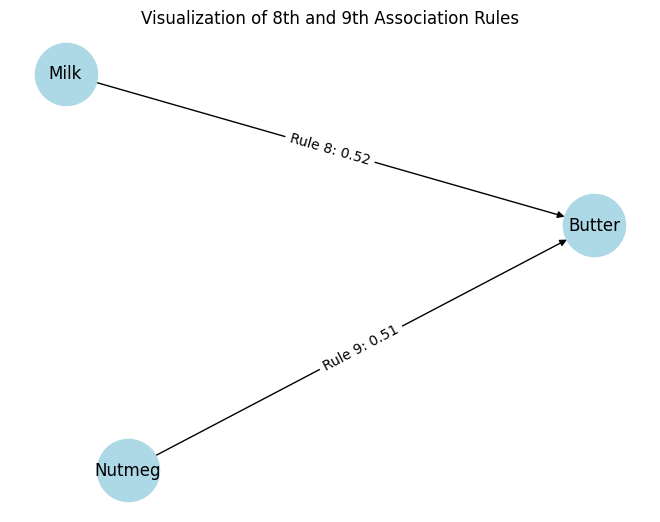

In [148]:
G = nx.DiGraph()
G.add_edge(eighth_antecedents[0], eighth_consequents[0], label=f"Rule 8: {eighth_rule['confidence']:.2f}")
G.add_edge(ninth_antecedents[0], ninth_consequents[0], label=f"Rule 9: {ninth_rule['confidence']:.2f}")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Visualization of 8th and 9th Association Rules")
plt.show()

In [150]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df) 
df['cluster'] = kmeans.labels_
cluster_analysis = df.groupby('cluster').mean()
cluster_analysis

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
cluster,,,,,,,,,,,,,,,,
0,0.693333,0.75,0.77,0.69,0.466667,0.186667,0.426667,0.603333,0.246667,0.196667,0.776667,0.59,0.726667,0.53,0.53,0.433333
1,0.222025,0.191829,0.129663,0.230906,0.190053,0.239787,0.211368,0.198934,0.170515,0.083481,0.181172,0.209591,0.227353,0.156306,0.211368,0.181172
2,0.458599,0.343949,0.43949,0.347134,0.605096,0.280255,0.363057,0.143312,0.449045,0.89172,0.426752,0.140127,0.401274,0.557325,0.630573,0.531847
3,0.238562,0.418301,0.77451,0.562092,0.53268,0.454248,0.477124,0.542484,0.947712,0.464052,0.434641,0.751634,0.431373,0.421569,0.653595,0.218954
4,0.47139,0.340599,0.294278,0.463215,0.438692,0.893733,0.490463,0.798365,0.389646,0.569482,0.427793,0.607629,0.564033,0.457766,0.449591,0.833787


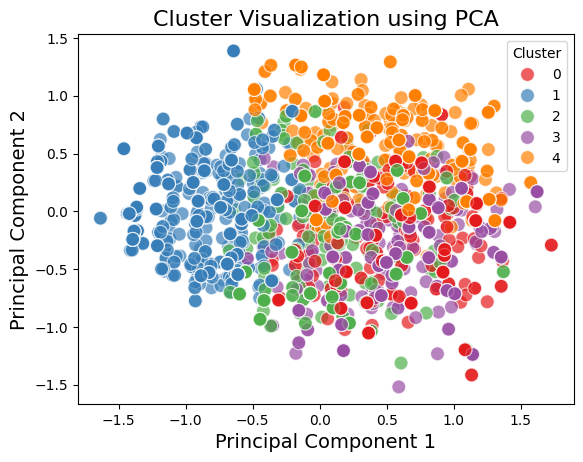

In [154]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('cluster', axis=1))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_pca, s=100, alpha=0.7, edgecolor='w')
plt.title("Cluster Visualization using PCA", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(title="Cluster", loc='upper right')
plt.show()

Text(0, 0.5, 'Itemsets')

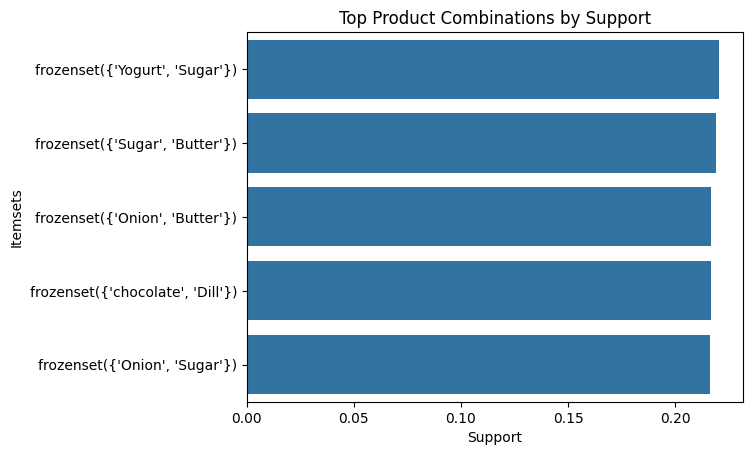

In [195]:
sns.barplot(x='support', y=top_combinations['itemsets'].astype(str), data=top_combinations)
plt.title('Top Product Combinations by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')

You can paste user_favotite_item to see what are its consequents

#### Example 1: with Apple

In [162]:
def recommend_products_based_on_item(user_favorite_item, rules, top_n=3):
    relevant_rules = rules[rules['antecedents'].apply(lambda x: user_favorite_item in x)]
    sorted_rules = relevant_rules.sort_values(by='confidence', ascending=False)
    recommendations = sorted_rules['consequents'].head(top_n).apply(lambda x: list(x)[0])
    return recommendations.tolist()
user_favorite_item = 'Apple'
recommended_products = recommend_products_based_on_item(user_favorite_item, rules)
print(f"Products recommended for fans of {user_favorite_item}: {recommended_products}")

Products recommended for fans of Apple: ['Sugar', 'Butter', 'Sugar']


#### Example 2: with Onion

In [173]:
def recommend_products_based_on_item(user_favorite_item, rules, top_n=3):
    relevant_rules = rules[rules['antecedents'].apply(lambda x: user_favorite_item in x)]
    sorted_rules = relevant_rules.sort_values(by='confidence', ascending=False)
    recommendations = sorted_rules['consequents'].head(top_n).apply(lambda x: list(x)[0])
    return recommendations.tolist()
user_favorite_item = 'Onion'
recommended_products = recommend_products_based_on_item(user_favorite_item, rules)
print(f"Products recommended for fans of {user_favorite_item}: {recommended_products}")

Products recommended for fans of Onion: ['Sugar', 'Butter', 'Cheese']


In [178]:
top_combinations = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
top_combinations = top_combinations.sort_values(by='support', ascending=False).head(5)
print("Top Product Combinations for Marketing:")
for itemset in top_combinations['itemsets']:
    print(", ".join(itemset))

Top Product Combinations for Marketing:
Yogurt, Sugar
Sugar, Butter
Onion, Butter
chocolate, Dill
Onion, Sugar


## Analysis Conclusion

My detailed analysis of product associations and customer purchasing behavior has yielded several key insights.

Through the frequent itemsets analysis, I identified the most popular products in the dataset. Items like Yogurt, Sugar, and Butter emerge as customer favorites, indicating their strong presence across transactions.

The association rule mining revealed valuable relationships between products. For instance, items like Sugar and Butter, or Onion and Butter, frequently appear together, demonstrating strong customer preference for these combinations.

Using association rules, we developed a product recommendation approach that suggests complementary items based on customer preferences. For example:
- Fans of Apple are likely to purchase Sugar and Butter.
- Fans of Onion often pair it with Sugar, Butter, or Cheese.

- Marketing Strategies: The insights into frequently purchased combinations and strong associations can inform cross-selling and bundle promotion strategies. For example, promoting Onion and Sugar together or targeting customers who purchase Yogurt with offers on Sugar could drive sales.
- Product Recommendations: The recommendation system derived from association rules can enhance the shopping experience by personalizing suggestions based on customer preferences.
- Inventory Planning: Understanding frequently purchased combinations helps in maintaining optimal inventory levels and reducing stockouts for popular items.

The analysis identified key product combinations, such as Yogurt and Sugar or Sugar and Butter, which can be leveraged in targeted campaigns to maximize customer engagement.

My findings provide actionable insights into customer behavior, equipping businesses with data-driven tools to improve sales, enhance customer experience, and align inventory and marketing strategies with conumer preferences.
